Indonesian news classification by title

Abie Nugraha

In [442]:
#import dataset
import pandas as pd 
df = pd.read_csv('/tmp/indonesian-news-title.csv')
df.head()

,date,url,title,category
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance


In [443]:
#drop dataset yang tidak digunakan
df = df.drop(columns=['date', 'url'])
df.head()

,title,category
0,Kemnaker Awasi TKA di Meikarta,finance
1,BNI Digitalkan BNI Java Jazz 2020,finance
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance


In [444]:
#one hot encoding category column
df = pd.concat([df['title'],pd.get_dummies(df.category)],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91017 entries, 0 to 91016
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    91017 non-null  object
 1   finance  91017 non-null  uint8 
 2   food     91017 non-null  uint8 
 3   health   91017 non-null  uint8 
 4   hot      91017 non-null  uint8 
 5   inet     91017 non-null  uint8 
 6   news     91017 non-null  uint8 
 7   oto      91017 non-null  uint8 
 8   sport    91017 non-null  uint8 
 9   travel   91017 non-null  uint8 
dtypes: object(1), uint8(9)
memory usage: 1.5+ MB


In [445]:
#bagi dataset menjadi train dan label
x = df['title'].values
y = df[['finance','food','health','hot','inet','news','oto','sport',
        'travel']].values

In [446]:
#preprocessing

import re

new_x = []
for teks in x :
  teks = teks.lower()                               # huruf kecil
  teks = re.sub("(\s|^)?[0-9]+(\s|$)?"," ",teks)    # angka
  teks = re.sub("[^\w\s]"," ",teks)                 # tanda baca
  teks = " ".join(teks.split())                     # spasi berlebih
  new_x.append(teks)


In [447]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_x,y,test_size=0.2)

In [448]:
#proses tokenizer dan sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

train_padded = pad_sequences(train_sequences)
test_padded = pad_sequences(test_sequences)

In [449]:
#buat model arsitektur dan compile
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
  Embedding(input_dim = 5000, output_dim = 16),
  LSTM(64),
  Dense(128, activation = 'relu'),
  Dense(64, activation = 'relu'),
  Dense(9, activation = 'softmax')
])

model.compile(
  loss = 'categorical_crossentropy',
  optimizer = 'adam',
  metrics = ['accuracy']
)

In [450]:
#buat callbacks untuk persingkat waktu pelatihan model
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback) :
  def end_epoch(self, epoch, logs={}): 
    if(logs.get('accuracy')>0.9):
      i = logs.get('accuracy')
      self.model.stop_training =True
callbacks = myCallback()

In [451]:
history = model.fit(
  train_padded, y_train, epochs = 30,  callbacks=[callbacks],
  validation_data = (test_padded, y_test), verbose = 2)

Epoch 1/30
2276/2276 - 37s - loss: 0.9262 - accuracy: 0.6896 - val_loss: 0.6518 - val_accuracy: 0.7889 - 37s/epoch - 16ms/step
Epoch 2/30
2276/2276 - 33s - loss: 0.5464 - accuracy: 0.8242 - val_loss: 0.5603 - val_accuracy: 0.8203 - 33s/epoch - 15ms/step
Epoch 3/30
2276/2276 - 33s - loss: 0.4488 - accuracy: 0.8533 - val_loss: 0.5189 - val_accuracy: 0.8320 - 33s/epoch - 15ms/step
Epoch 4/30
2276/2276 - 33s - loss: 0.3925 - accuracy: 0.8690 - val_loss: 0.5246 - val_accuracy: 0.8276 - 33s/epoch - 15ms/step
Epoch 5/30
2276/2276 - 35s - loss: 0.3510 - accuracy: 0.8823 - val_loss: 0.5249 - val_accuracy: 0.8367 - 35s/epoch - 15ms/step
Epoch 6/30
2276/2276 - 33s - loss: 0.3179 - accuracy: 0.8919 - val_loss: 0.5435 - val_accuracy: 0.8305 - 33s/epoch - 15ms/step
Epoch 7/30
2276/2276 - 34s - loss: 0.2886 - accuracy: 0.9018 - val_loss: 0.5602 - val_accuracy: 0.8312 - 34s/epoch - 15ms/step
Epoch 8/30
2276/2276 - 35s - loss: 0.2636 - accuracy: 0.9113 - val_loss: 0.5957 - val_accuracy: 0.8224 - 35s/ep

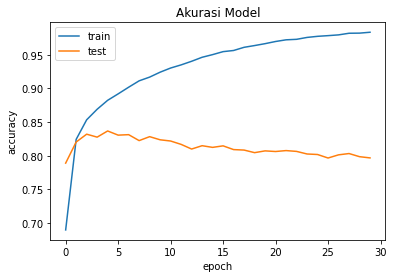

In [452]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

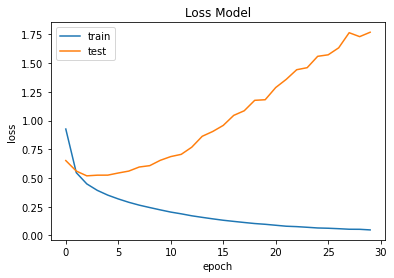

In [453]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()